In [1]:
import DQN_components as agent_factory
from DQN_components.plotter import plot_trend
import enviroment

2024-10-17 14:37:41.367317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 14:37:41.374026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 14:37:41.397034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 14:37:41.441783: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 14:37:41.453410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 14:37:41.483351: I tensorflow/core/platform/cpu_feature_gu

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Snake è risolto con Approximate Q-learning tramite neural network

Rappresentazione di stato semplificata con soli 11 valori

In [4]:
env = enviroment.LinearStateSnakeGame(visual=False)

In [5]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/LNN/easy_state/", file_name_model="model.keras")
plot_trend(train_result, extra_title="")

# Prioritized Experience Replay

In [ ]:
agent_per = agent_factory.Agent_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_per = agent_per.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/LNN/easy_state/", file_name_model="model_PER.keras")
plot_trend(train_result_per, extra_title="PER")

# Double DQN

Game: 500, Epsilon: 0.000000, Score: 30, Record: 56, Step eseguiti: 83691. 

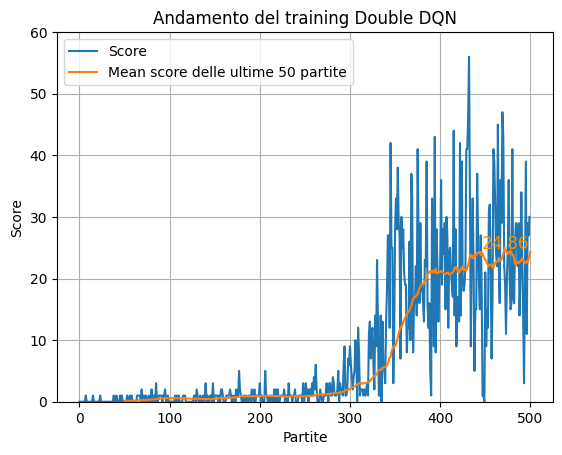

In [5]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3,)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/LNN/easy_state/", file_name_model="model_DDQN.keras")
plot_trend(train_result, extra_title="Double DQN")

# PER + DDQN

epsilon greedy policy

In [ ]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/LNN/easy_state/", file_name_model="model_PER+DDQN_eps.keras")
plot_trend(train_result, extra_title="PER + DDQN e-greedy")

Game: 365, Epsilon: 0.000000, Score: 2, Record: 41, Step eseguiti: 35802.  

softmax policy

Game: 500, Epsilon: 0.000000, Score: 22, Record: 44, Step eseguiti: 144698. 

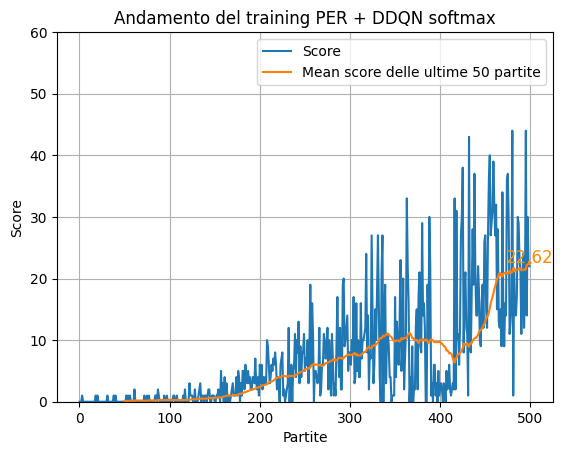

In [6]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, eps_greedy=False)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, 
                            directory_path="./DQN_saved_model/LNN/easy_state/", file_name_model="model_PER+DDQN_sftmx.keras")
plot_trend(train_result, extra_title="PER + DDQN softmax")

# Rappresentazione di stato più complessa: una matrice 7x7 al cui centro la testa di snake.

In [3]:
env = enviroment.MatrixStateSnakeGame(visual=False)

Game: 700, Epsilon: 0.000000, Score: 34, Record: 55, Step eseguiti: 193673. 

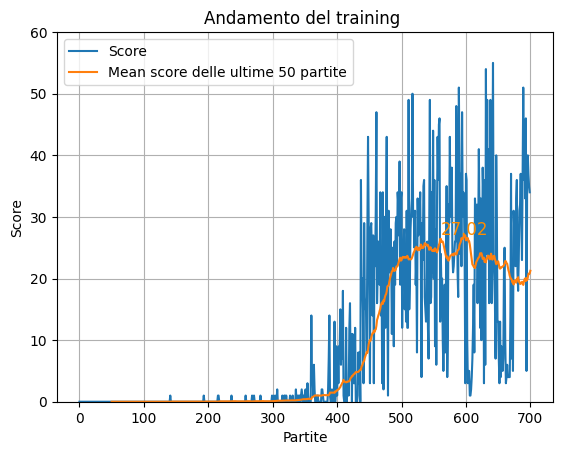

In [3]:
agent = agent_factory.Agent(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4, eps_greedy=True)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, 
                                 directory_path="./DQN_saved_model/LNN/matrix_state/", file_name_model="model.keras")
plot_trend(train_result, extra_title="")

Game: 700, Epsilon: 0.000000, Score: 23, Record: 66, Step eseguiti: 178507. 

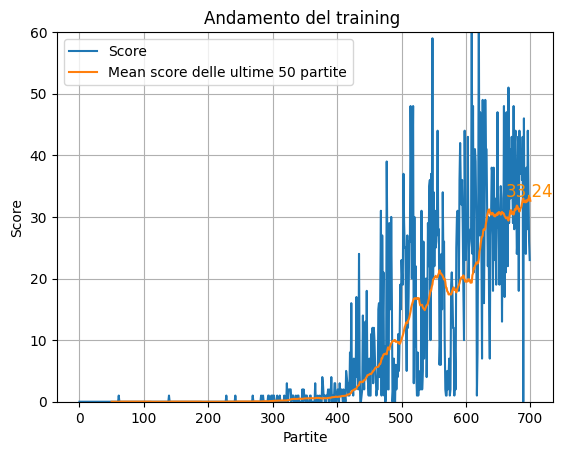

In [4]:
agent = agent_factory.Agent_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4, eps_greedy=False)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, 
                                 directory_path="./DQN_saved_model/LNN/matrix_state/", file_name_model="model_PER.keras")
plot_trend(train_result, extra_title="")

Game: 700, Epsilon: 0.000000, Score: 23, Record: 53, Step eseguiti: 140899. 

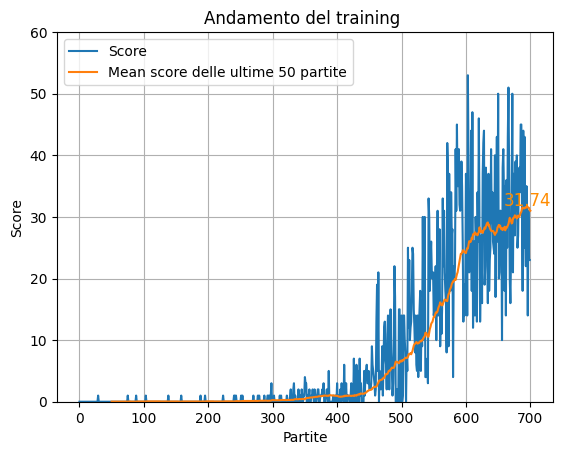

In [5]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4, eps_greedy=True)
train_result = agent.train_agent(N_GAME=700, episode_decay=350, 
                                 directory_path="./DQN_saved_model/LNN/matrix_state/", file_name_model="model_DDQN.keras")
plot_trend(train_result, extra_title="")

Game: 700, Epsilon: 0.000000, Score: 28, Record: 59, Step eseguiti: 146123. 

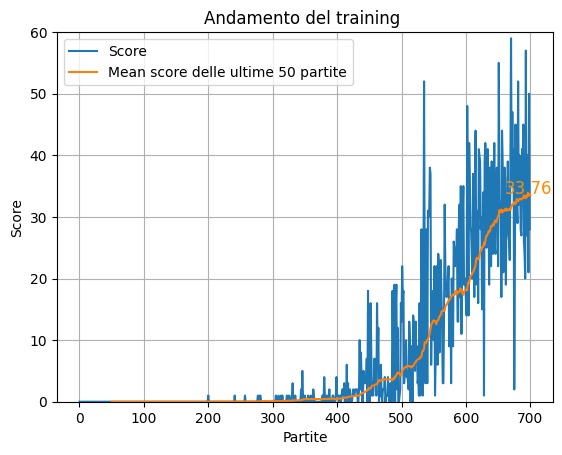

In [6]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4, eps_greedy=True)
train_result = agent.train_agent(N_GAME=700, episode_decay=350,
                                 directory_path="./DQN_saved_model/LNN/matrix_state/", 
                                 file_name_model="model_PER+DDQN_eps.keras")
plot_trend(train_result, extra_title="")

Game: 700, Epsilon: 0.000000, Score: 31, Record: 58, Step eseguiti: 166342. 

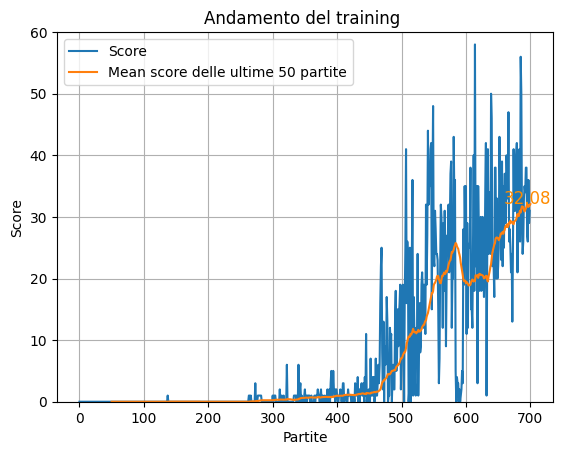

In [7]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024, 
                            model_units=[128, 256], input_shape=[53], n_actions=4, eps_greedy=False)
train_result = agent.train_agent(N_GAME=700, episode_decay=350,
                                 directory_path="./DQN_saved_model/LNN/matrix_state/", 
                                 file_name_model="model_PER+DDQN_sftmx.keras")
plot_trend(train_result, extra_title="")